<a href="https://colab.research.google.com/github/VaishnaviMoorthy-SRM/Diabetes_prediction_using_RF/blob/main/Diabetes_Rail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

Reading the data

In [ ]:
df = pd.read_csv('rail.csv')

Exploratory Data Analysis (EDA)

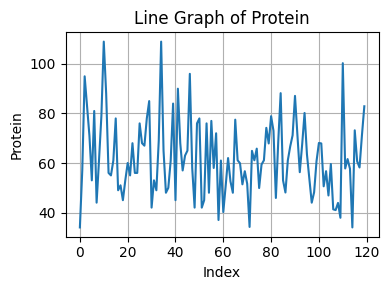

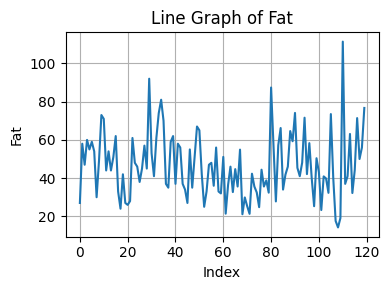

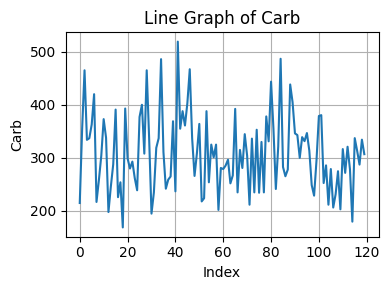

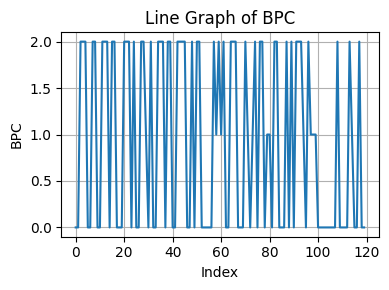

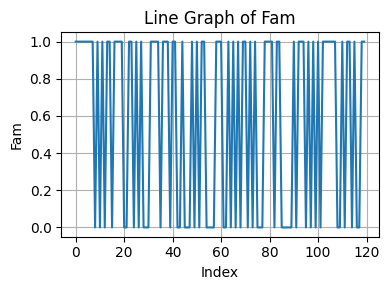

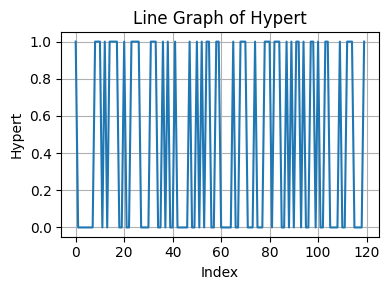

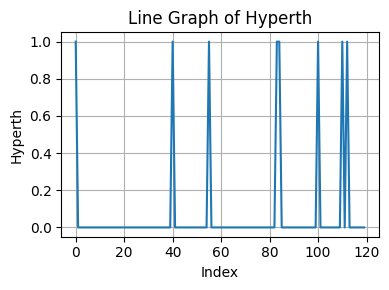

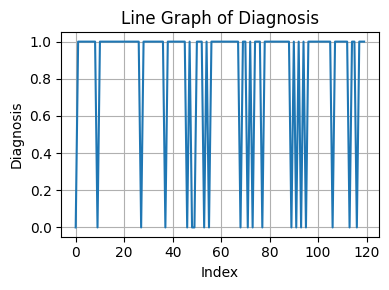

In [ ]:
numerical_columns = df.iloc[:, 1:].select_dtypes(include=[np.number]).columns

# Plot each numerical column as a line graph in separate figures
for col in numerical_columns:
    plt.figure(figsize=(4,3))
    plt.plot(df.index, df[col])
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Line Graph of {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

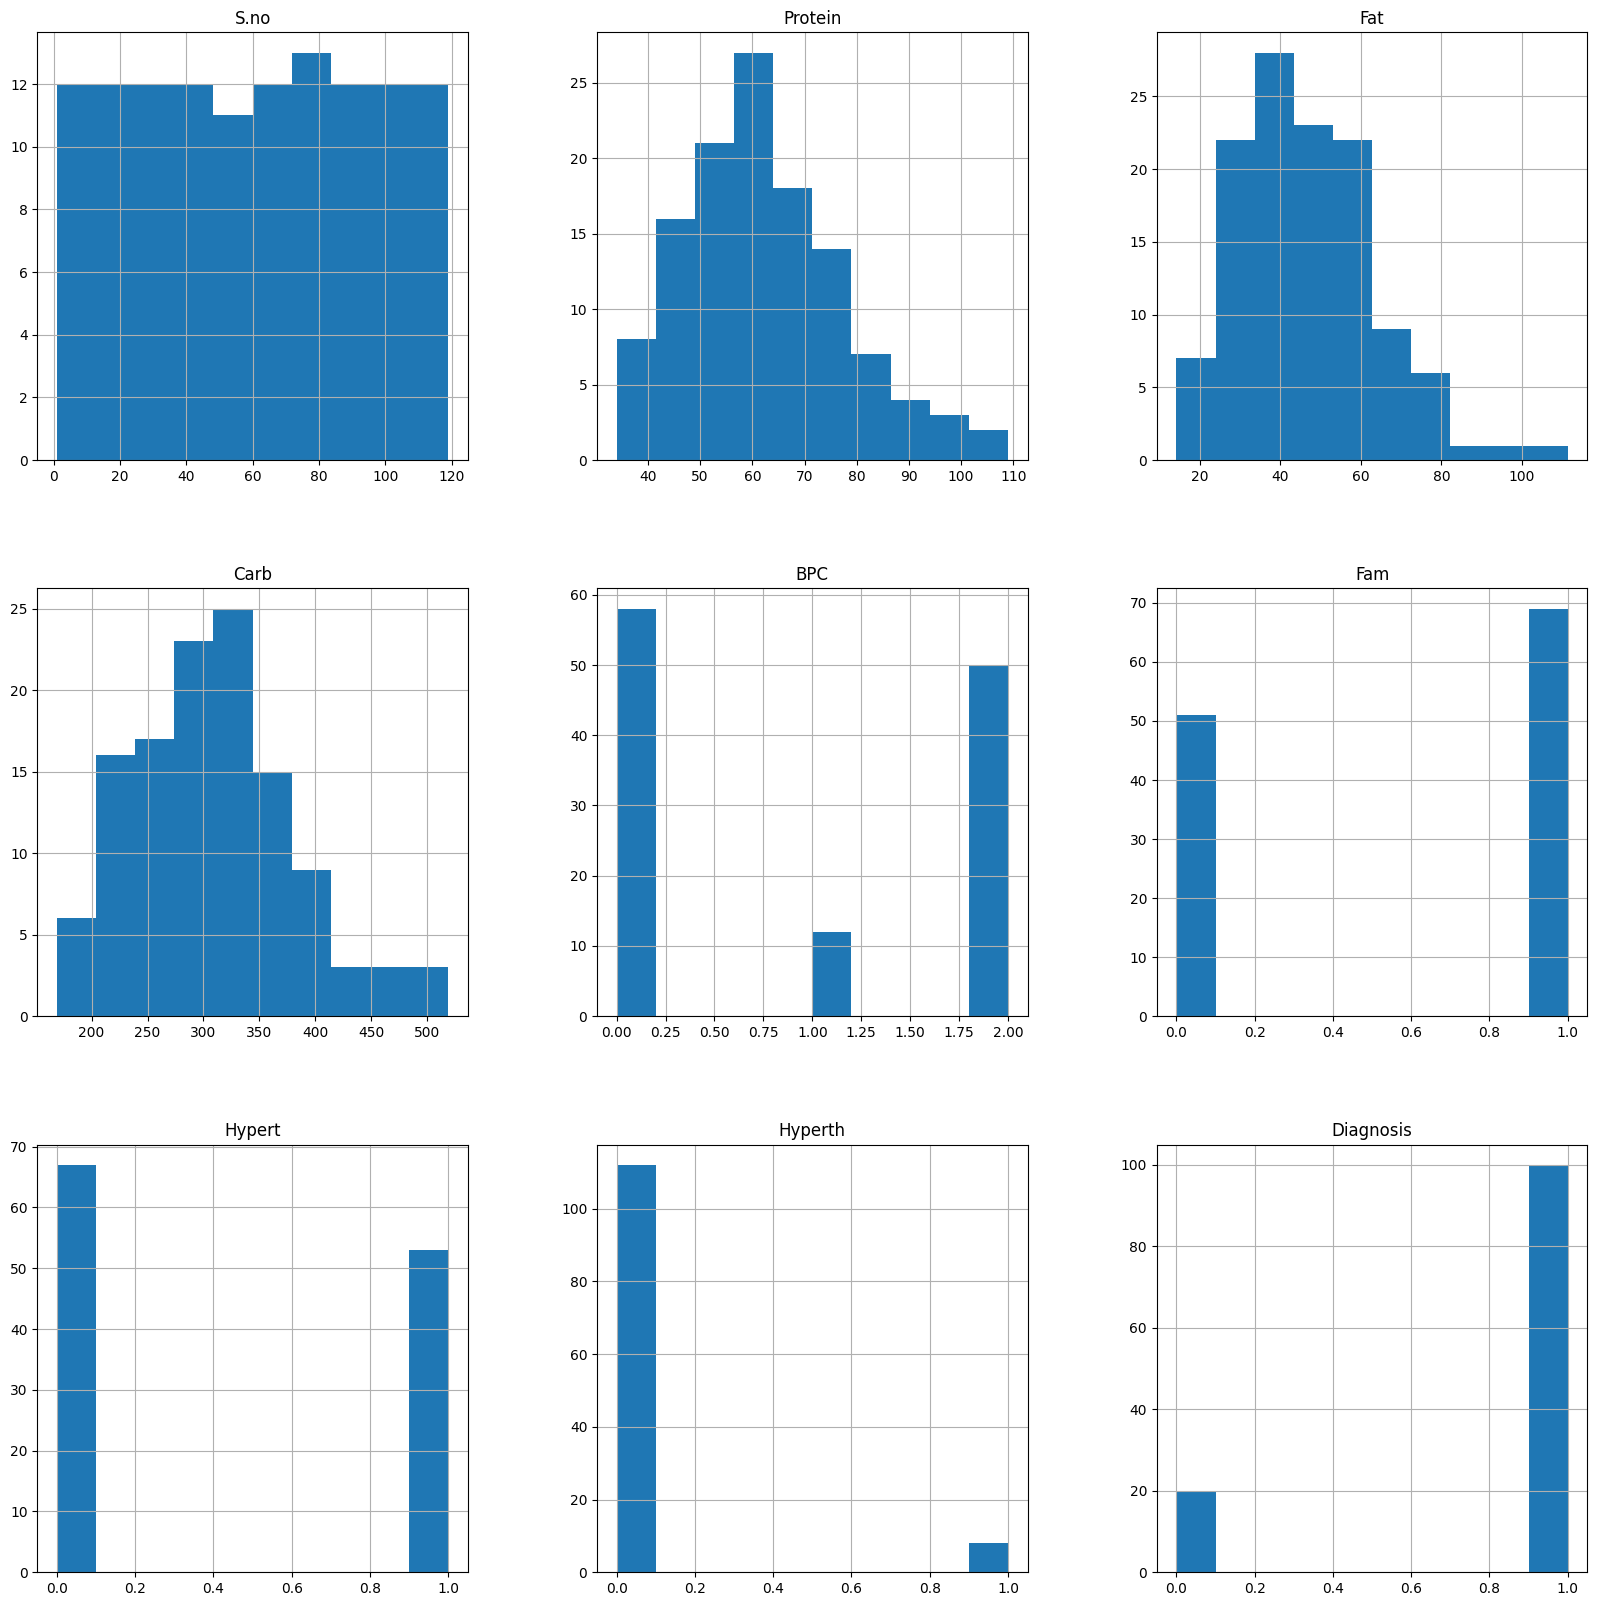

In [ ]:
p = df.hist(figsize = (20,20))

1.0    100
0.0     20
Name: Diagnosis, dtype: int64


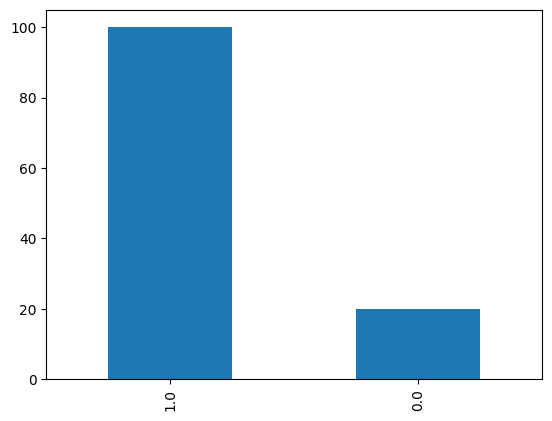

In [ ]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Diagnosis"].map(lambda x: color_wheel.get(x + 1))
print(df.Diagnosis.value_counts())
p=df.Diagnosis.value_counts().plot(kind="bar")

<ipython-input-49-158cf480f1b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')


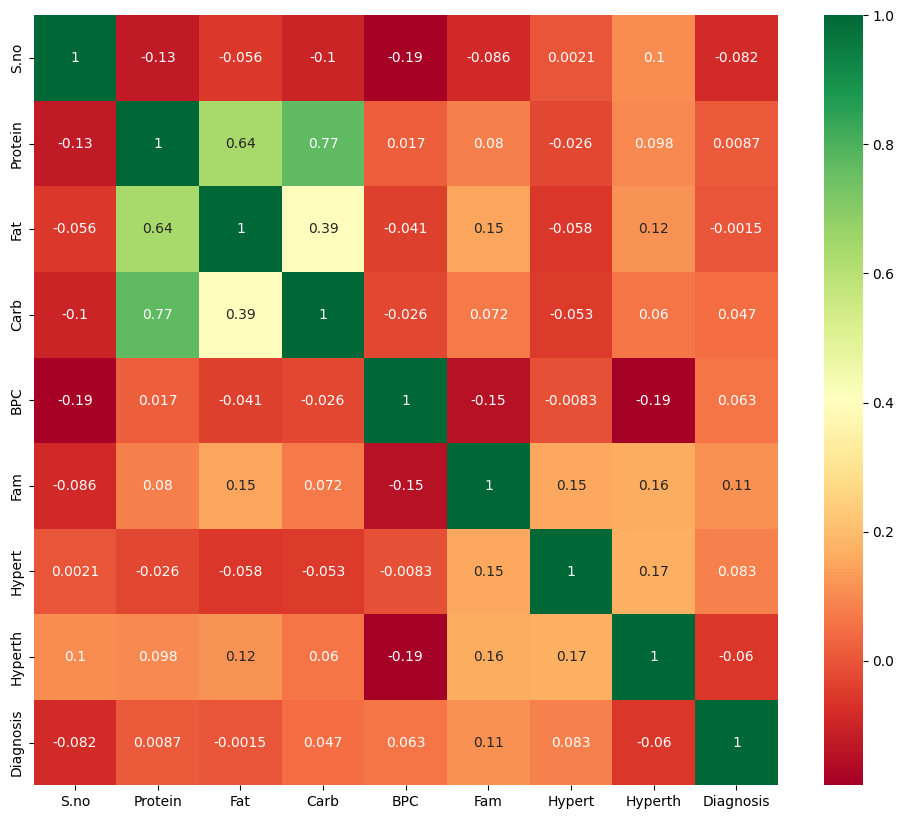

In [ ]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

Prepare the data for training and testing



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Assuming you have a DataFrame 'df' containing the dataset
# Access the feature columns and the target column directly using .loc
X = df.loc[:, ['Protein', 'Fat', 'Carb', 'BPC', 'Fam']]
y = df['Diagnosis']

# Handle missing values in the feature matrix (X) using SimpleImputer
X_imputer = SimpleImputer(strategy='mean')
X_imputed = X_imputer.fit_transform(X)

# Handle missing values in the target vector (y) using SimpleImputer
y_imputer = SimpleImputer(strategy='most_frequent')
y_imputed = y_imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier using the training data
rf_classifier.fit(X_train, y_train)

# Now the classifier is trained and ready for predictions

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.84      1.00      0.91        21

    accuracy                           0.84        25
   macro avg       0.42      0.50      0.46        25
weighted avg       0.71      0.84      0.77        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Create the Random Forest classifier

Confusion matrix

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.84
Confusion Matrix:
[[ 0  4]
 [ 0 21]]


Plotting the features

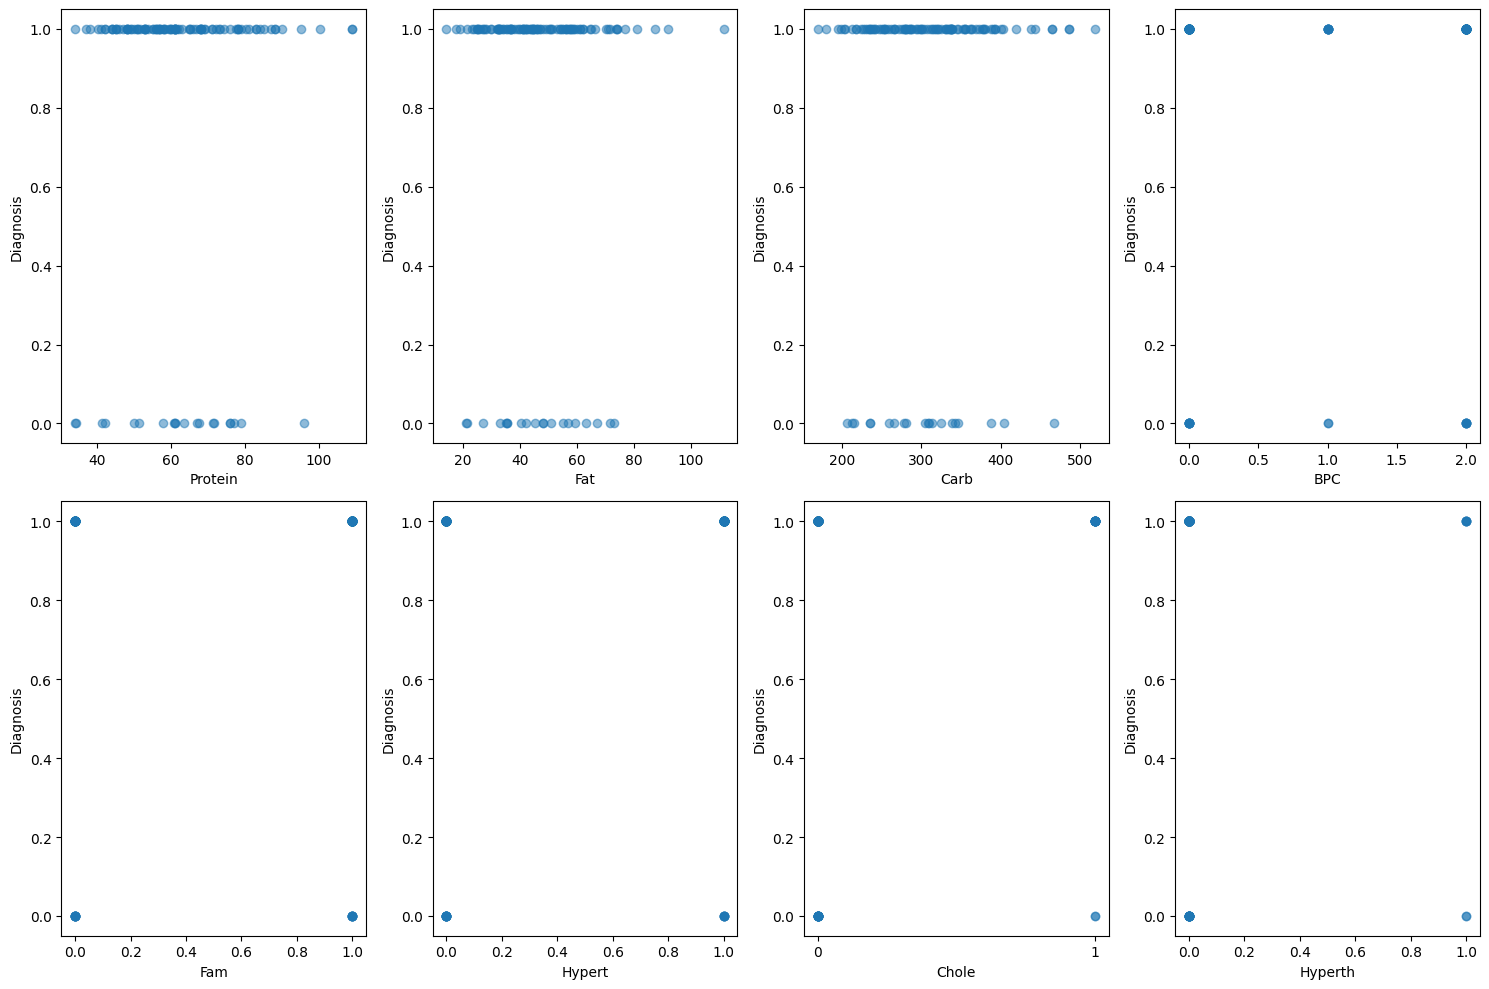

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' containing the dataset

# Create subplots with 2 rows and 4 columns (2 features per row)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

# List of features for plotting
features = ['Protein', 'Fat', 'Carb', 'BPC', 'Fam', 'Hypert', 'Chole', 'Hyperth']

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    axes[row, col].scatter(df[feature], df['Diagnosis'], alpha=0.5)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Diagnosis')

# Remove any empty subplot(s) if there are more than 8 features
for i in range(len(features), 2 * 4):
    row = i // 4
    col = i % 4
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


 Feature importances in order

In [ ]:
feature_importances = rf_classifier.feature_importances_

# Pair each feature with its importance and sort in descending order
feature_importance_pairs = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Display the most important features and their importances
print("Feature Importances:")
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")
feature_df = pd.DataFrame(feature_importance_pairs, columns=['Feature', 'Importance'])


Feature Importances:
Fat: 0.309856643588699
Carb: 0.30411265553821015
Protein: 0.2775486825785232
BPC: 0.05777568315236931
Fam: 0.050706335142198466


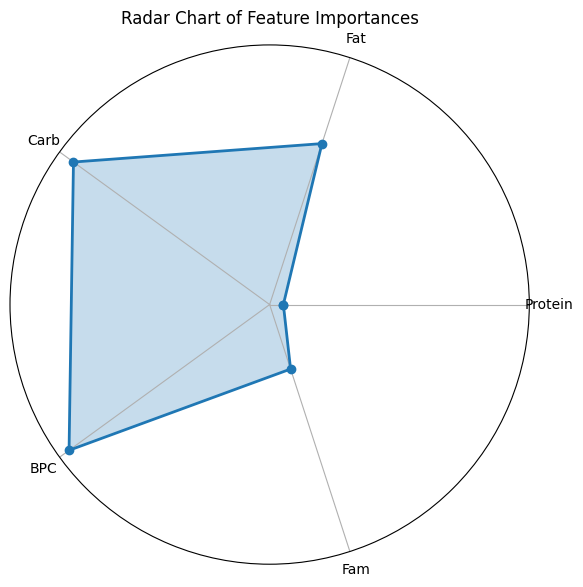

In [ ]:
features = ['Protein', 'Fat', 'Carb', 'BPC', 'Fam']
feature_importances = np.random.rand(len(features))

# Radar Chart for Feature Importances
plt.figure(figsize=(8, 6))
angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False)
feature_importances = np.concatenate((feature_importances, [feature_importances[0]]))  # Closing the loop
angles = np.concatenate((angles, [angles[0]]))  # Closing the loop
ax = plt.subplot(1, 1, 1, polar=True)
ax.plot(angles, feature_importances, 'o-', linewidth=2)
ax.fill(angles, feature_importances, alpha=0.25)
plt.xticks(angles[:-1], features)
plt.title('Radar Chart of Feature Importances')
plt.yticks([])  # Hide radial ticks
plt.tight_layout()
plt.show()

<ipython-input-73-541ddcf8acd9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(df['Fat'])
<ipython-input-73-541ddcf8acd9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(df['Carb'])


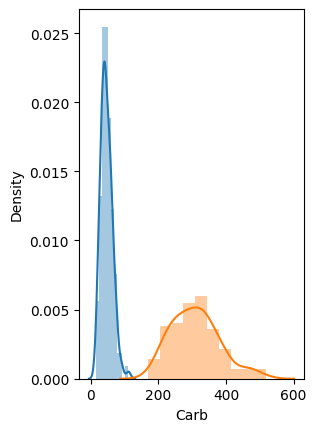

In [ ]:
plt.subplot(121), sns.distplot(df['Fat'])
plt.subplot(121), sns.distplot(df['Carb'])
plt.show()

Calculating the Sensitivity, Specificity, Precision and F1 score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rfc_accuracy = accuracy_score(y_test,  y_pred)
rfc_sensitivity = recall_score(y_test,  y_pred)
rfc_specificity = recall_score(y_test,  y_pred, pos_label=0)
rfc_precision = precision_score(y_test,  y_pred)
rfc_f1_score = f1_score(y_test,  y_pred)

print("Random Forest Evaluation:")
print("Accuracy:", rfc_accuracy)
print("Sensitivity (Recall):", rfc_sensitivity)
print("Specificity:", rfc_specificity)
print("Precision:", rfc_precision)
print("F1 Score:", rfc_f1_score)
print()


Random Forest Evaluation:
Accuracy: 0.84
Sensitivity (Recall): 1.0
Specificity: 0.0
Precision: 0.84
F1 Score: 0.9130434782608696

